<a href="https://colab.research.google.com/github/kanwar-sidhu/cardekho-price-car-/blob/main/cardekho_used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Used Car Price Prediction</h1>
<h3 align="center">End to End Machine Learning Project</h3>

# Process Flow of Project


1. Understanding Problem Statement
2. Getting System Ready
3. Data Collection
4. Understanding the Data-Data Eyeballing & Data Description
5. Data Cleaning & Preprocessing I
6. Exploratory Data Analysis (EDA)
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
7. Data Cleaning & Preprocessing II
8. Insights from Data Visualization
9. Feature Engineerig
10. Model Buidling & Evaluation
11. Selection of Best Model & Hyperparameter Tuninng
12. Generating Pickle file

# 1) Understanding Problem Statement
---


### Problem Statement:

The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

### Approach:

We propose to develop a machine learning model that can predict the price of a used car based on its features. The model will be trained on a dataset of used cars that have been sold on Cardekho.com in India. The model will then be able to be used to predict the price of any used car, given its features.

### Objective

To build suitable Machine Learning Model for Used Car Price Prediction.

### Benefits:

The benefits of this solution include:

- Sellers will be able to more accurately price their cars which will help them to sell their cars faster and for a higher price.
- Buyers will be able to find cars that are priced more competitively.
- The overall used car market in India will become more efficient.


**We believe that this project has the potential to make a significant impact on the used car market in India. We are excited to work on this project and to see the positive impact that it can have.**

# 2) Getting System Ready
---

### Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline

# 3) Data Collection
---

The data for the model is already scrapped and available on a GitHub repo. We can directly download the data from the repo and use it to train the model.

### Download and Import the CSV Data as Pandas DataFrame

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/kanwar-sidhu/cardekho-price-car-/main/cardekho_dataset.csv")

# 4) Understanding the Data-Data Eyeballing & Data Description
---

In [3]:
df.head(30)

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
5,5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
6,6,Hyundai i10,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
7,7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
8,8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
9,12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000


In [4]:
print('The size of Dataframe is: ', df.shape)
df.info()


The size of Dataframe is:  (15411, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [5]:
# Define numerical features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Define categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Print columns
print(f' {len(numeric_features)} numerical features: {numeric_features}')
print(f' {len(categorical_features)} categorical features: {categorical_features}')

 8 numerical features: ['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
 6 categorical features: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Data Decritption(Feature Information)

* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

In [6]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Calculate total missing values
missing_data = df.isnull().sum()
missing_data

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

#### Inference

After inspecting the dataframe, **no missing values** found.

In [7]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [8]:
df.describe(include= 'object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [9]:
# List of columns to check for unique categories
columns_to_check = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

for column in columns_to_check:
    unique_values = df[column].unique()
    n_unique = len(unique_values)
    print(f"'{column}' variable has {n_unique} unique category:")
    print(unique_values)
    print('-'*125)

'car_name' variable has 121 unique category:
['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda Jazz' 'BMW 3' 'Audi A4' 'Tata Tigor'
 'Maruti Ertiga' 'Tata Safari' 'Mahindra Thar' 'Tata Hexa'
 'Land Rover Rover' 'Maruti Eeco' 'Audi A6' 'Mercedes-Benz E-Class'
 'Audi Q7' 'BMW Z4' 'BMW 6' 'Jaguar XF' 'BMW X5' 'MG Hector' 'Honda Civic'
 'Isuzu D-Max' 'Porsche Cayenne' 'B

# 5) Data Cleaning & Preprocessing I

Not required as of now

# 6) Exploratory Data Analysis

## 5.1 Univariate Analysis

### Numerical Features

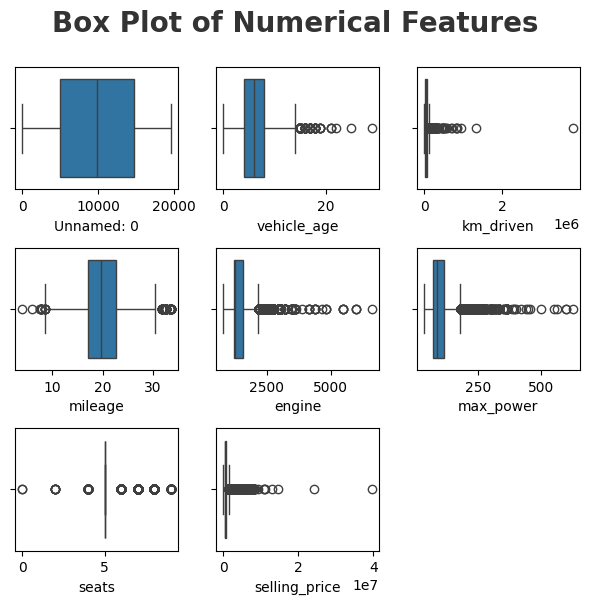

In [10]:
plt.figure(figsize=(6, 6))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report
- Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
- Outliers in km_driven, enginer, selling_price, and max power.

### Categorical Features

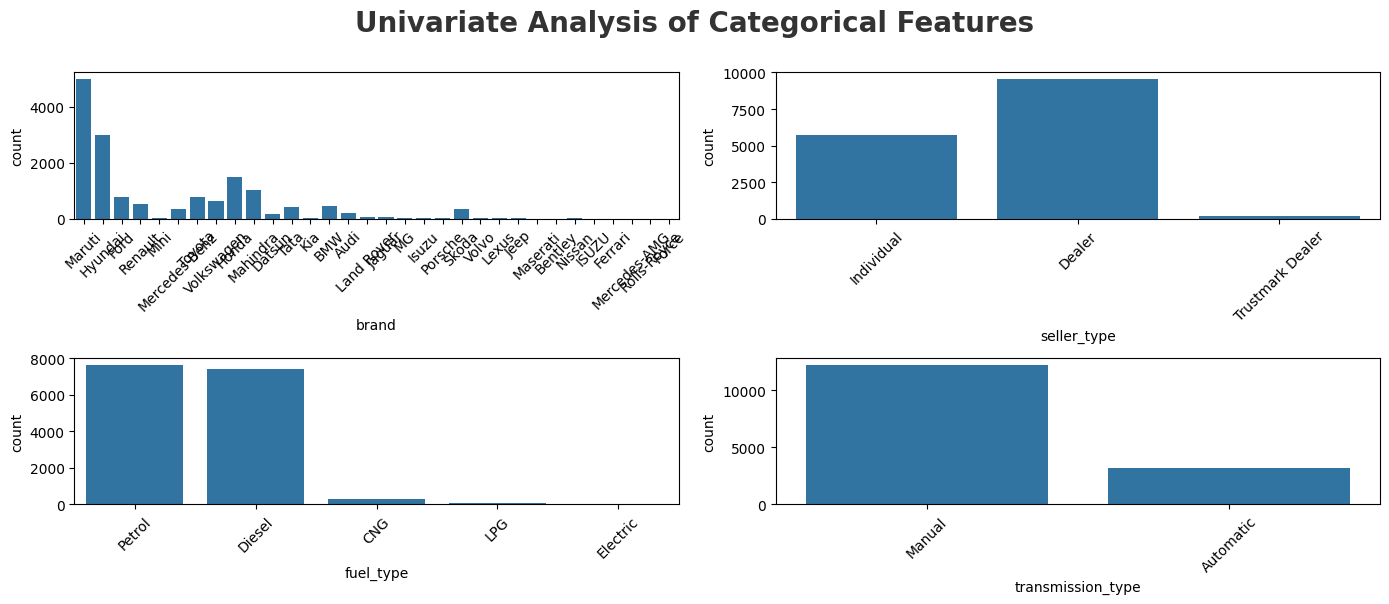

In [11]:
plt.figure(figsize=(14, 6))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## 5.2 Bivariate Analysis

In [12]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


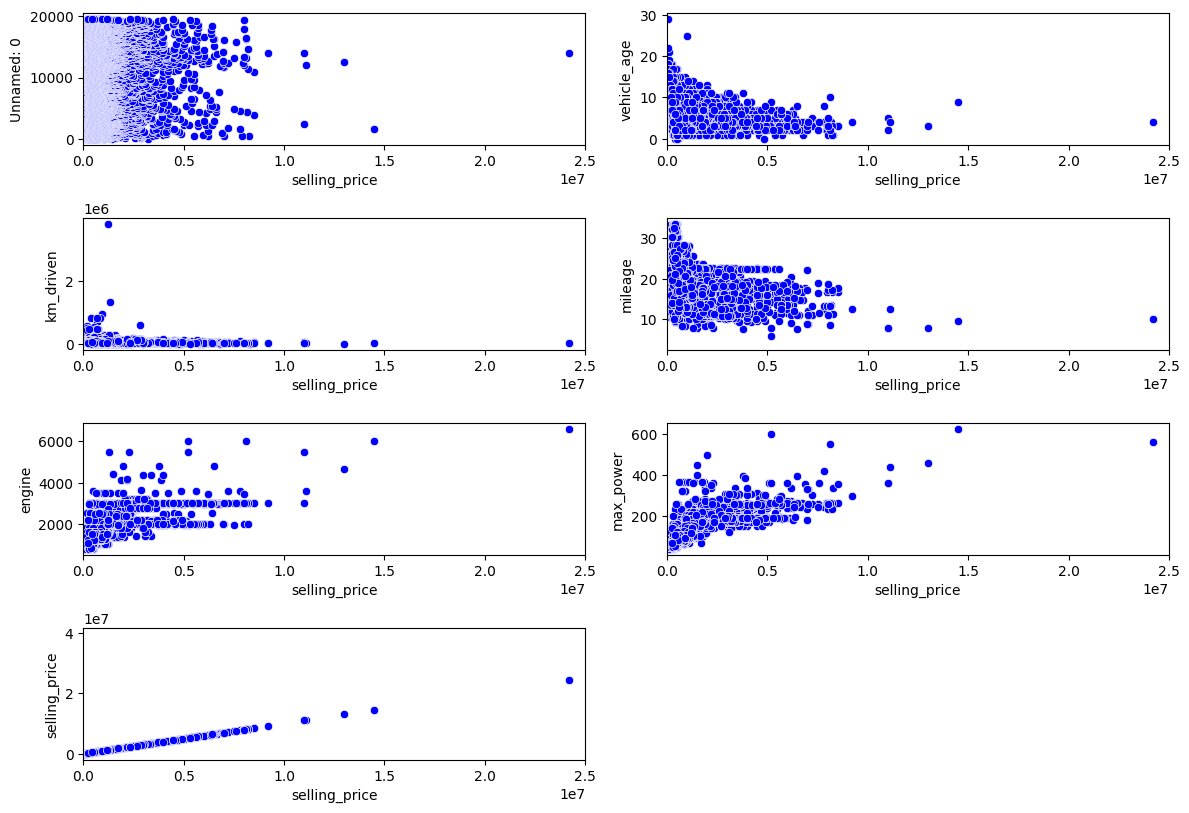

In [13]:
fig = plt.figure(figsize=(12, 16))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

#### Inference
- **Lower Vehicle age has more selling price than Vehicle with more age.**
- **Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.**
- **Kms Driven has negative effect on selling price.**

## 5.3 Multivariate Analysis

### Check Multicollinearity in Numerical features

In [14]:
df[numeric_features].corr()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
Unnamed: 0,1.000000,-0.006250,-0.003778,-0.014699,0.012972,0.039367,-0.031832,0.030523
vehicle_age,-0.006250,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,-0.003778,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.014699,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.012972,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.039367,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,-0.031832,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,0.030523,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


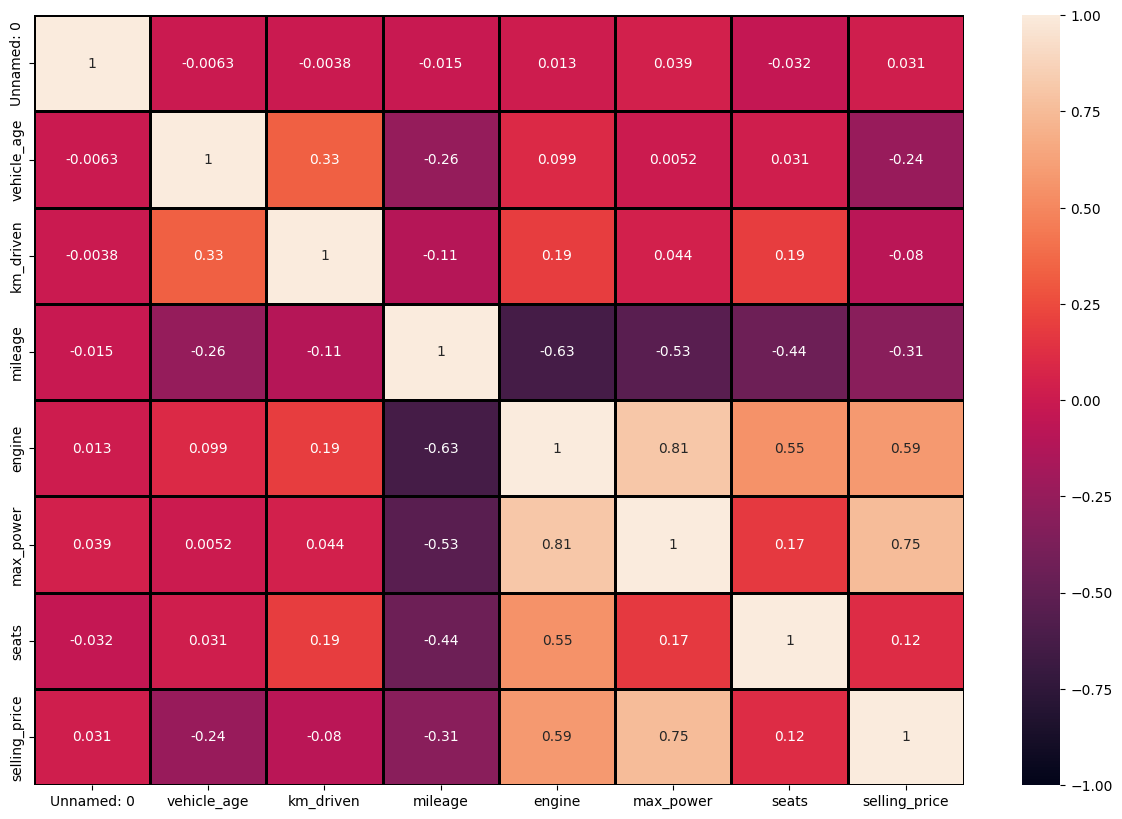

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df[numeric_features].corr(), annot= True,  vmin= -1 , vmax= 1, linecolor='black', linewidths=2)
plt.show()

#### Inference
- 1. Max Power and Engine are highly correlated
- 2. Max Power and Selling Price are highly correlated.

# 8) Insights from Data Visualization

## Selling Price Distribution (Target Feature Distribution)

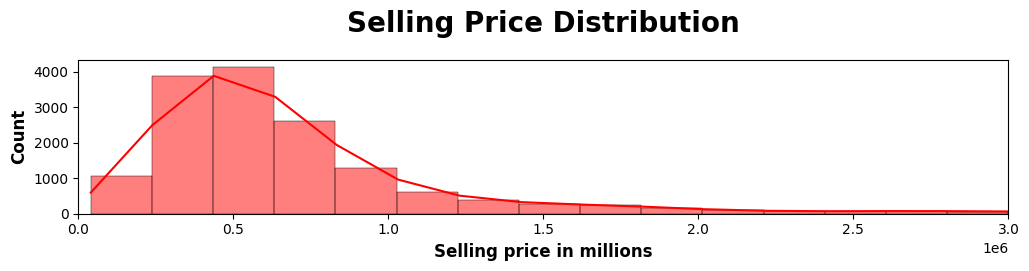

In [16]:
plt.subplots(figsize=(12,2))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'r')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

- From the chart it is clear that the Target Variable Skewed

## Most Sold Cars on CarDekho Website

In [17]:
print(df['car_name'].value_counts().head(10))

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64


- Most Selling Used Car is Hyundai i20

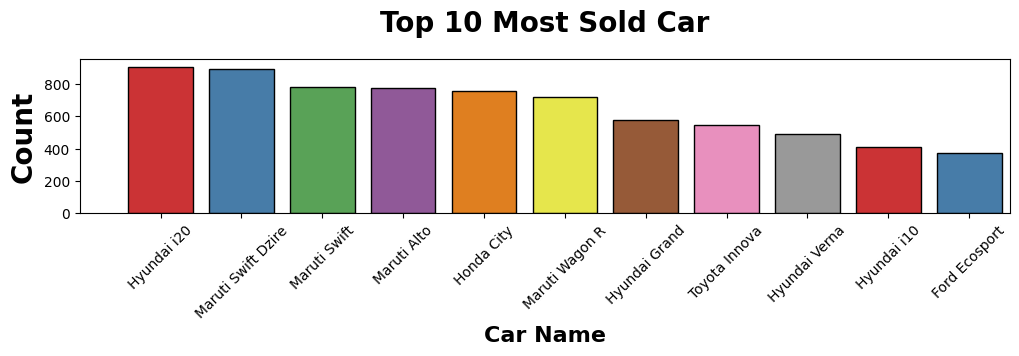

In [18]:
plt.subplots(figsize=(12,2))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

- Check mean price of Hyundai i20 which is most sold

In [19]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


#### Inference
* As per the Chart these are top 10 most selling cars in used car website.
* Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
* Mean Price of Most Sold Car is 5.4 lakhs.
* This Feature has impact on the Target Variable.

## Most Sold Car Brand on CarDekho Website

In [20]:
print('Top 10 Most Sold Car Brand')

print(df['brand'].value_counts().head(10))

Top 10 Most Sold Car Brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64


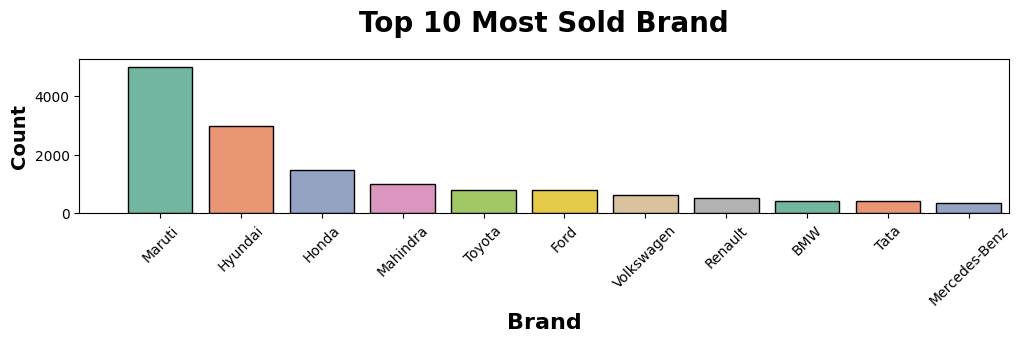

In [21]:
plt.subplots(figsize=(12,2))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

- Check the Mean price of Maruti brand which is most sold

In [22]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


####
* As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

## Costlier Brand on CarDekho Website

In [23]:
brand = df.groupby('brand').selling_price.max()
brand = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
print('Top 10 Costlier Brands on CarDekho Website')


brand

Top 10 Costlier Brands on CarDekho Website


,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


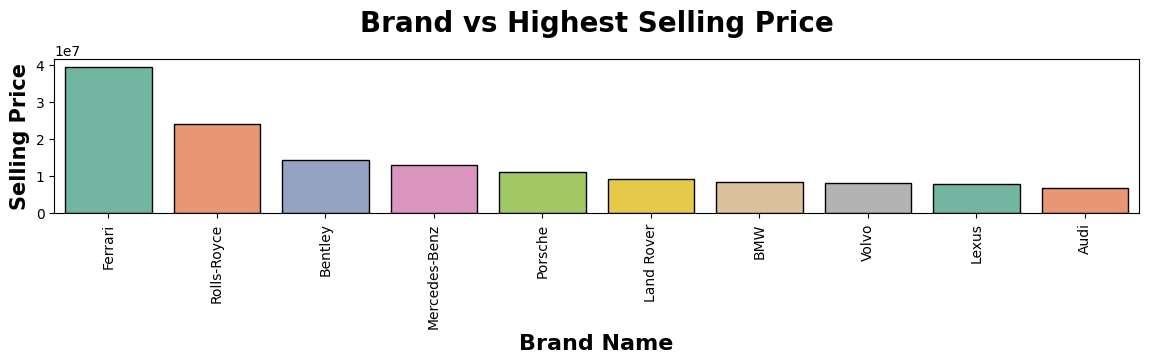

In [24]:
plt.subplots(figsize=(14,2))
sns.barplot(x=brand.index, y=brand.selling_price,ec = "black",palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

####
* Costliest Brand sold is Ferrari at 3.95 Crores.
* Second most costliest car Brand is Rolls-Royce as 2.42 Crores.
* Brand name has very clear impact on selling price.

## Costlier Car on CarDekho Website

In [25]:
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]
print('Top 10 Costlier Cars on CarDekho Website')
car

Top 10 Costlier Cars on CarDekho Website


,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


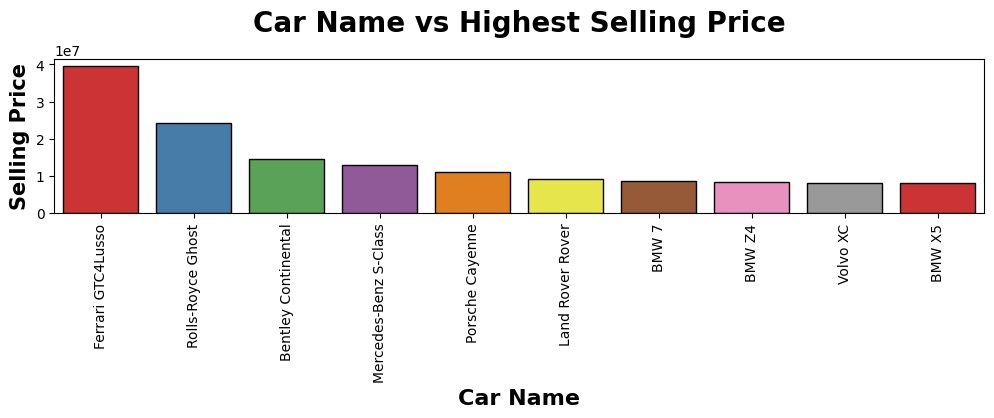

In [26]:
plt.subplots(figsize=(12,2))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Inference
* Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
* Ferrari selling price is 3.95 Crs.
* Other than Ferrari other car has priced below 1.5cr.

## Kilometers Driven Vs Selling Price

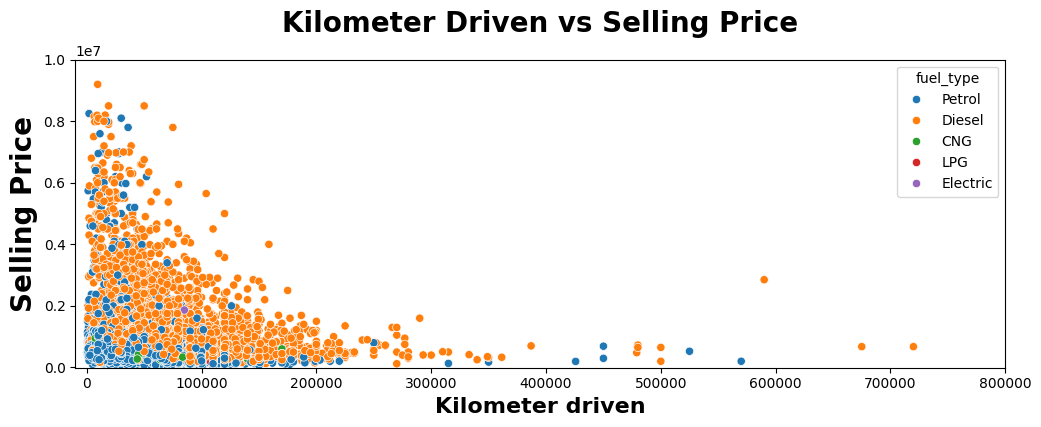

In [27]:
plt.subplots(figsize=(12,4))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

#### Inference
- Many Cars were sold with kms between 0 to 20k Kilometers
- Low Kms driven cars had more selling price compared to cars which had more kms driven.

## Fuel Type Vs Selling Price

In [28]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


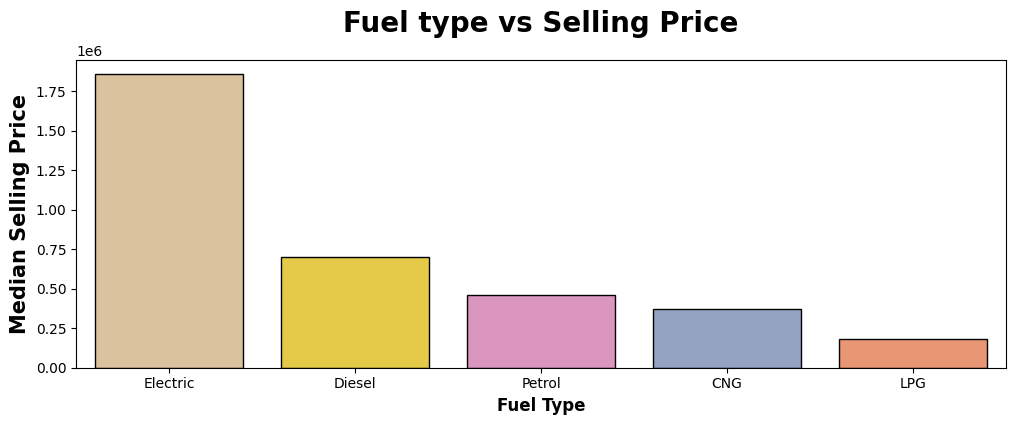

In [29]:
plt.subplots(figsize=(12,4))
sns.barplot(x=fuel.index, y=fuel.values, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### Inference
- Electric cars have highers selling average price.
- Followed by Diesel and Petrol.
- Fuel Type is also important feature for the Target variable.

## Final Report

- The datatypes and Column names were right and there was 15411 rows and 13 columns
- The `selling_price` column is the target to predict. i.e Regression Problem.
- There are outliers in the `km_driven`, `enginer`, `selling_price`, and `max power`.
- Dealers are the highest sellers of the used cars.
- Skewness is found in few of the columns will check it after handling outliers.
- Vehicle age has negative impact on the price.
- Manual cars are mostly sold and automatic has higher selling average than manual cars.
- Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
- We just need less data cleaning for this dataset.

# 9) Feature Engineering

## Removing unnecessary features

**Dropping `car_name` ,`brand` and `model`**

These features  are not directly correlated with the price of car and they can actually introduce noise into the model. For example, two cars with the same features but different brands may have different prices. This is because brand reputation and perceived quality can play a role in determining the price of a car. By dropping the `car_name` ,`brand` and `model`, we can create a model that is more accurate and reliable.

In [30]:
# Creating copy of  original dataframe
df_model=df.copy()
df_model

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [31]:
df_model.drop(labels=['car_name','brand','model','Unnamed: 0'],axis=1,inplace=True)
df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


## Converting Categorical Columns into numerical

Using **`One Hot Encoding (get_dummies)`** to convert categorical variables to numerical

In [32]:
df_model=pd.get_dummies(df_model,dtype=float)
df_model

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Independent Variables & Target Variable

In [33]:
df_model.rename(columns={'Unnamed: 0': 'car_code'}, inplace=True)


In [34]:
columns_to_drop = ['selling_price']
X=df_model.drop(columns=columns_to_drop)
       # Feature Matrix
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [35]:
y=df_model['selling_price']    # Target Variable
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

# 10) Model Building & Evaluation

## Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Importing important libraries for Model Building

In [37]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from xgboost import XGBRegressor


In [38]:
models = [ LinearRegression,  DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso,XGBRegressor]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))


## Creating DataFrame for Model Comparison

In [39]:
ML_model_df=pd.DataFrame({"Model":[ 'Linear Regression',  'Decision Tree Regressor', \
                                   'Random Forest Regressor', 'Ridge', 'Lasso','XGBRegressor'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,R-Sqaure Score(Accuracy)
Model,,,
Linear Regression,1.986207e+11,445668.848976,0.681835
Decision Tree Regressor,6.191603e+10,248829.315161,0.900819
Random Forest Regressor,3.512220e+10,187409.188966,0.943739
Ridge,1.986158e+11,445663.307238,0.681843
Lasso,1.986203e+11,445668.332267,0.681836
XGBRegressor,3.515561e+10,187498.283920,0.943685


# 12) Generating Pickle File- Saving Trained Model

In [40]:
import pickle

saved_models = []

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)

    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_newmodel.pkl"
    with open(model_filename, 'wb') as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

In [41]:
saved_models

['LinearRegression_newmodel.pkl',
 'DecisionTreeRegressor_newmodel.pkl',
 'RandomForestRegressor_newmodel.pkl',
 'Ridge_newmodel.pkl',
 'Lasso_newmodel.pkl',
 'XGBRegressor_newmodel.pkl']

In [42]:
import pandas as pd
import numpy as np
import joblib

def prepare_input(vehicle_age, km_driven, mileage, engine, max_power, seats,
                  seller_type, fuel_type, transmission_type):
    # Initialize all one-hot encoded columns to 0
    features = {

        'vehicle_age': vehicle_age,
        'km_driven': km_driven,
        'mileage': mileage,
        'engine': engine,
        'max_power': max_power,
        'seats': seats,
        'seller_type_Dealer': 0,
        'seller_type_Individual': 0,
        'seller_type_Trustmark Dealer': 0,
        'fuel_type_CNG': 0,
        'fuel_type_Diesel': 0,
        'fuel_type_Electric': 0,
        'fuel_type_LPG': 0,
        'fuel_type_Petrol': 0,
        'transmission_type_Automatic': 0,
        'transmission_type_Manual': 0
    }

    # Set the appropriate one-hot encoded columns based on the input
    if seller_type in features:
        features[f'seller_type_{seller_type}'] = 1
    if fuel_type in features:
        features[f'fuel_type_{fuel_type}'] = 1
    if transmission_type in features:
        features[f'transmission_type_{transmission_type}'] = 1

    return features

def predict_car_price(vehicle_age, km_driven, mileage, engine, max_power, seats,
                      seller_type, fuel_type, transmission_type):
    # Prepare the input
    input_features = prepare_input(vehicle_age, km_driven, mileage, engine, max_power, seats,
                                   seller_type, fuel_type, transmission_type)

    # Convert the input features to a DataFrame
    df = pd.DataFrame([input_features])

    # Load the model
    model = joblib.load('RandomForestRegressor_newmodel.pkl')

    # Predict the price
    predicted_price = model.predict(df)

    return predicted_price[0]

# Example usage
predicted_price = predict_car_price(
    vehicle_age=14,
    km_driven=75000,
    mileage=20,
    engine=1000,
    max_power=47,
    seats=5,
    seller_type='individual',
    fuel_type='Petrol',
    transmission_type='Manual'
)
print(f"Predicted price: {predicted_price}")


Predicted price: 122590.0


In [43]:
import sys
import sklearn
import numpy
import pandas
import joblib
import matplotlib
import seaborn
import pickle

print("Python version:", sys.version)
print("scikit-learn version:", sklearn.__version__)
print("numpy version:", numpy.__version__)
print("pandas version:", pandas.__version__)
print("joblib version:", joblib.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", seaborn.__version__)


Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
scikit-learn version: 1.2.2
numpy version: 1.25.2
pandas version: 1.5.3
joblib version: 1.3.2
matplotlib version: 3.7.1
seaborn version: 0.13.1


In [44]:
import platform
print(platform.python_version())

3.10.12
